## **DengAI EDA Notebook**
This notebook contains the EDA for the DengAI competition

### Environment Prep and Data Load

In [1]:
#Run the utils notebook
%run DengAI-Utils.ipynb

Environment is: AzureML


In [2]:
#Load data into dataframes for analysis
df_train, df_labels, df_holdout= load_all_data()
df_all=df_train.copy()
#df_all['total_cases']=df_labels['total_cases']


### Descriptive Statistics
Descriptive statistics of each dataset can be found in 'train_holdout_stats.csv'. Note there are some key differences in specific metrics for the training and holdout sets, particularly in temperature and precipitation. 

Representative data, including target, is below


In [47]:
df_all.iloc[:,0:14].head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0  0.177617                 12.42             297.572857   
1  0.155486                 22.82             298.211429   
2  0.170843                 34.54             298.781429   
3  0.235886                 15.36             298.987143   
4  0.247340                  7.52             299.518571   

   reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0             297.742857                   292.414286   
1             298.442857                   293.951429   
2             298.878571                   295.434286   
3             299.228571                   295.310000   
4             299.664286                   295.821429   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  
0                      299.8                      295.9  
1                      300.9                      296.4  
2                      300.5                      297.3  
3                      301.4                      297.0  
4                      301.9                      297.5

In [46]:
df_all.iloc[:,14:-1].head()

reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  
2                32.2                22.8               41.4  
3                33.3                23.3                4.0  
4                35.0                23.9                5.8

**Features to Scale and Normalize**<br>

In [139]:
norm_list=['reanalysis_air_temp_k','reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k',
           'reanalysis_min_air_temp_k','station_avg_temp_c','station_max_temp_c','station_min_temp_c']
scale_list=['station_diur_temp_rng_c','reanalysis_tdtr_k','precipitation_amt_mm','reanalysis_precip_amt_kg_per_m2',
            'reanalysis_relative_humidity_percent','reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg','station_precip_mm']

### Distribution of Data
#### Training Data Distribution

<function matplotlib.pyplot.show(*args, **kw)>

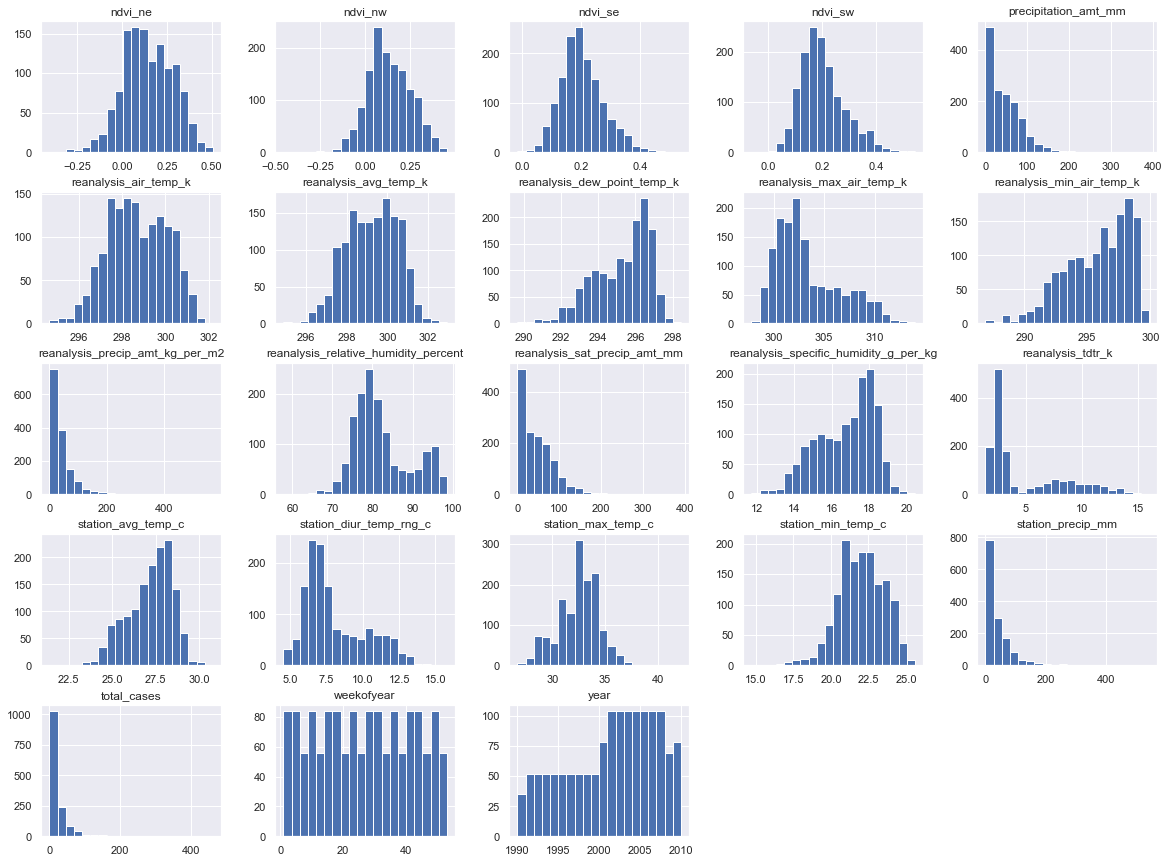

In [5]:
#Plot histogram to see data distribution
df_all.hist(bins=20, figsize=(20,15))
plt.show

#### Holdout Data Distribution

<function matplotlib.pyplot.show(*args, **kw)>

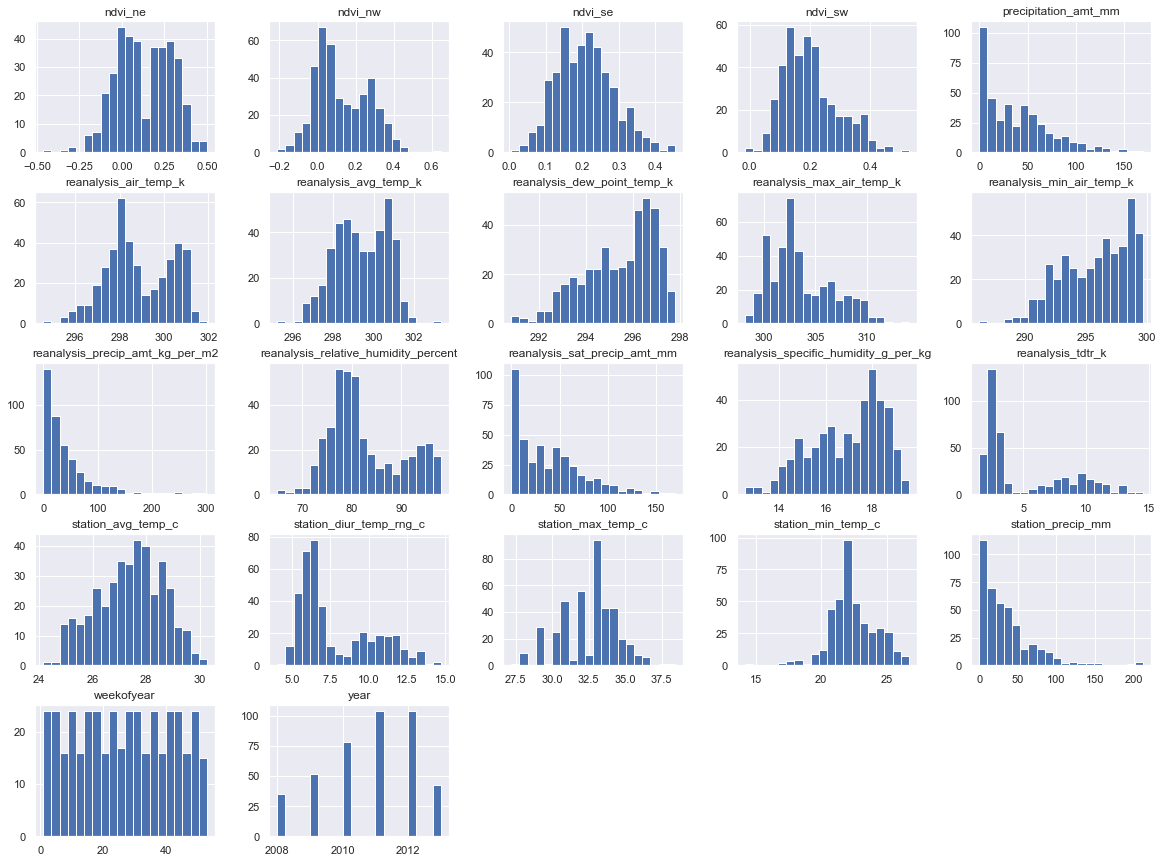

In [6]:
#Plot histogram to see data distribution
df_holdout.hist(bins=20, figsize=(20,15))
plt.show

#### Data Distribution Observations
*discuss each data column and compare between train and holdout. Discuss strategies for dealing with ditributions and differences*

### Trend of Total Cases

In [11]:
#Get count by week of year for each city
df_iq=df_labels[df_labels['city']=='iq']
df_sj=df_labels[df_labels['city']=='sj']
df_count_by_week_iq=df_iq.groupby('weekofyear')['total_cases'].sum()
df_count_by_week_sj=df_sj.groupby('weekofyear')['total_cases'].sum()
df_count_by_week_iq=pd.DataFrame(df_count_by_week_iq)
df_count_by_week_sj=pd.DataFrame(df_count_by_week_sj)

df_count_by_week_iq.head()

total_cases
weekofyear             
1                    93
2                   138
3                   108
4                   158
5                   148

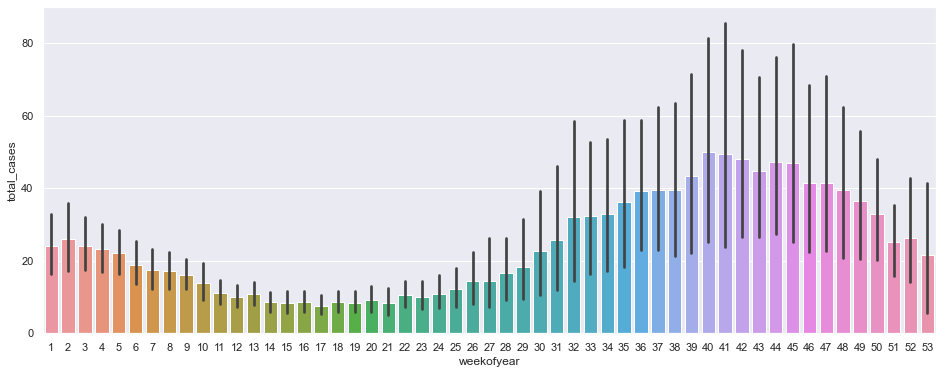

In [9]:
#Look at the trend of total cases per week of the year for both cities combined
plt.figure(figsize=(16, 6))
sns.barplot(x='weekofyear',y='total_cases',data=df_labels)
plt.show()

<Figure size 1152x432 with 0 Axes>

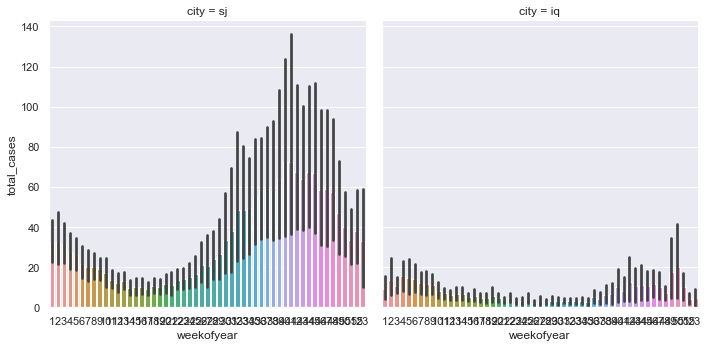

In [7]:
#Look at the trend of total cases per week of the year for each city
plt.figure(figsize=(16, 6))
sns.catplot(x='weekofyear',y='total_cases',data=df_labels,col='city',kind='bar')
plt.show()

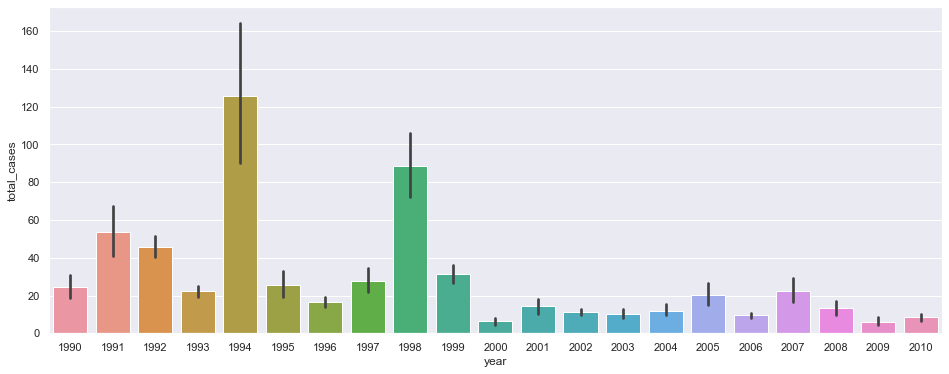

In [14]:
#Plot cases for both cities for each year
#Look at the trend of total cases per week of the year for both cities combined
plt.figure(figsize=(16, 6))
sns.barplot(x='year',y='total_cases',data=df_labels)
plt.show()

<Figure size 1152x432 with 0 Axes>

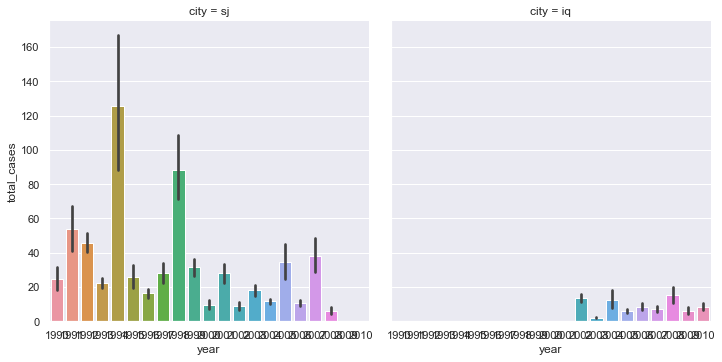

In [15]:
#Plot cases for both cities for each year
#Look at the trend of total cases per week of the year for both cities combined
plt.figure(figsize=(16, 6))
sns.catplot(x='year',y='total_cases',data=df_labels,kind='bar',col='city')
plt.show()

**Trend and Seasonality of Total Cases Observations**<br>
The graphs above show that over time the amount of dengue fever has not trended up or down on a year over year basis. There does appear to be cycles that emerge every 1-2 years and there is seasonality throughout the year. Depending on the model used for making predictions, seasonality and cycles should be considered. Also, San Juan appears to have had major outbreaks in two of the years.

### Data Correlation
Determine the correlation among various features. Start at a high level by creating a correlation matrix. In particular, look to see which features are most correlated with total cases. Test the hypothesis that there is a lag between environmental conditions and total cases by time shifting the dataset and iteratively looking at correlation. 

Try this first with raw data and then discretize the data and try again

#### Time Lag Correlation of Features to Total Cases
Create datasets for time lags to see if there is a correlation between environmental factors and total cases, and if so, at what lag that correlation is most apprent

In [16]:
#Interpolate missing data in time series
df_input=interp(df_input)

#Split data by city to get two datasets
df_sj, df_iq=split_by_city(df_input)
df_sj_labels, df_iq_labels=split_by_city(df_labels)

#Create time shifted datasets using the training data. Do this seperately for each city
shift=16
corr='kendall'

#Create list containers for the dataframes
df_sj_names=[]
df_iq_names=[]
for i in range(1,shift+1):
    df_sj_names.append('df_sj_s'+str(i))
    df_iq_names.append('df_iq_s'+str(i))

#Create two lists of dataframes with lags=shift
for i in range(0,shift):
    #City SJ
    df_sj_names[i]=df_sj.iloc[:,4:24] #Get just the data to shift
    df_sj_names[i]=df_sj_names[i].shift(periods=i) #shift by 1 period
    df_sj_names[i]=df_sj_names[i].iloc[i:-1,:] #Drop the first row since it's all Nans
    df_sj_labels=df_sj_labels.iloc[0:-1,:] #Drop the first i rows in the label set
    df_sj_names[i]=df_sj_names[i].join(df_sj_labels)
    #City IQ
    df_iq_names[i]=df_iq.iloc[:,4:24] #Get just the data to shift
    df_iq_names[i]=df_iq_names[i].shift(periods=i) #shift by 1 period
    df_iq_names[i]=df_iq_names[i].iloc[i:-1,:] #Drop the first row since it's all Nans
    df_iq_labels=df_iq_labels.iloc[0:-1,:] #Drop the first row in the label set
    df_iq_names[i]=df_iq_names[i].join(df_iq_labels)

#For each dataframe, compute correlation matrix and build a list for each time shift of correlation with total_cases
df_corr_sj=df_sj_names[0].corr(method=corr)
df_corr_sj=pd.DataFrame(df_corr_sj.iloc[:,-1])
df_corr_sj.rename(columns={'total_cases':'total_cases_s1'},inplace=True)
df_corr_iq=df_iq_names[0].corr(method=corr)
df_corr_iq=pd.DataFrame(df_corr_iq.iloc[:,-1])
df_corr_iq.rename(columns={'total_cases':'total_cases_s1'},inplace=True)

for i in range(0,shift):
        df=df_sj_names[i].corr(method=corr)
        df=pd.DataFrame(df.iloc[:,-1])
        df_corr_sj=df_corr_sj.join(df,rsuffix='_s'+str(i+1))
        df_i=df_sj_names[i].corr(method=corr)
        df_i=pd.DataFrame(df.iloc[:,-1])
        df_corr_iq=df_corr_iq.join(df_i,rsuffix='_s'+str(i+1))
        
df_corr_sj.drop(columns='total_cases',inplace=True)
df_corr_iq.drop(columns='total_cases',inplace=True)

df_corr_sj.to_csv('outputdata/sj_corr.csv')
df_corr_iq.to_csv('outputdata/iq_corr.csv')


##### Plot of Correlation Between Total Cases and Features for Time Lags of 1-16 Weeks for SJ
Largest correlations appear between weeks 11-13

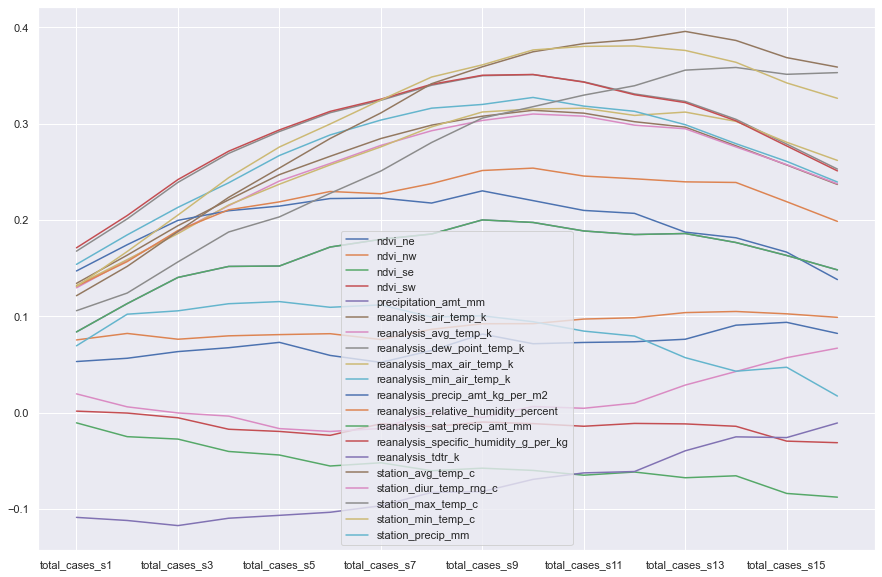

In [17]:
#quick plot of the correlations for SJ
df_t=df_corr_sj.T
df_t.iloc[:,0:20].plot(figsize=(15,10))

In [13]:
df=load_input_data()
df=interp(df)

df_sj=df[df['city']=='sj']
df_iq=df[df['city']=='iq']

sj_corr=df_sj.corr()
iq_corr=df_iq.corr()

<AxesSubplot:>

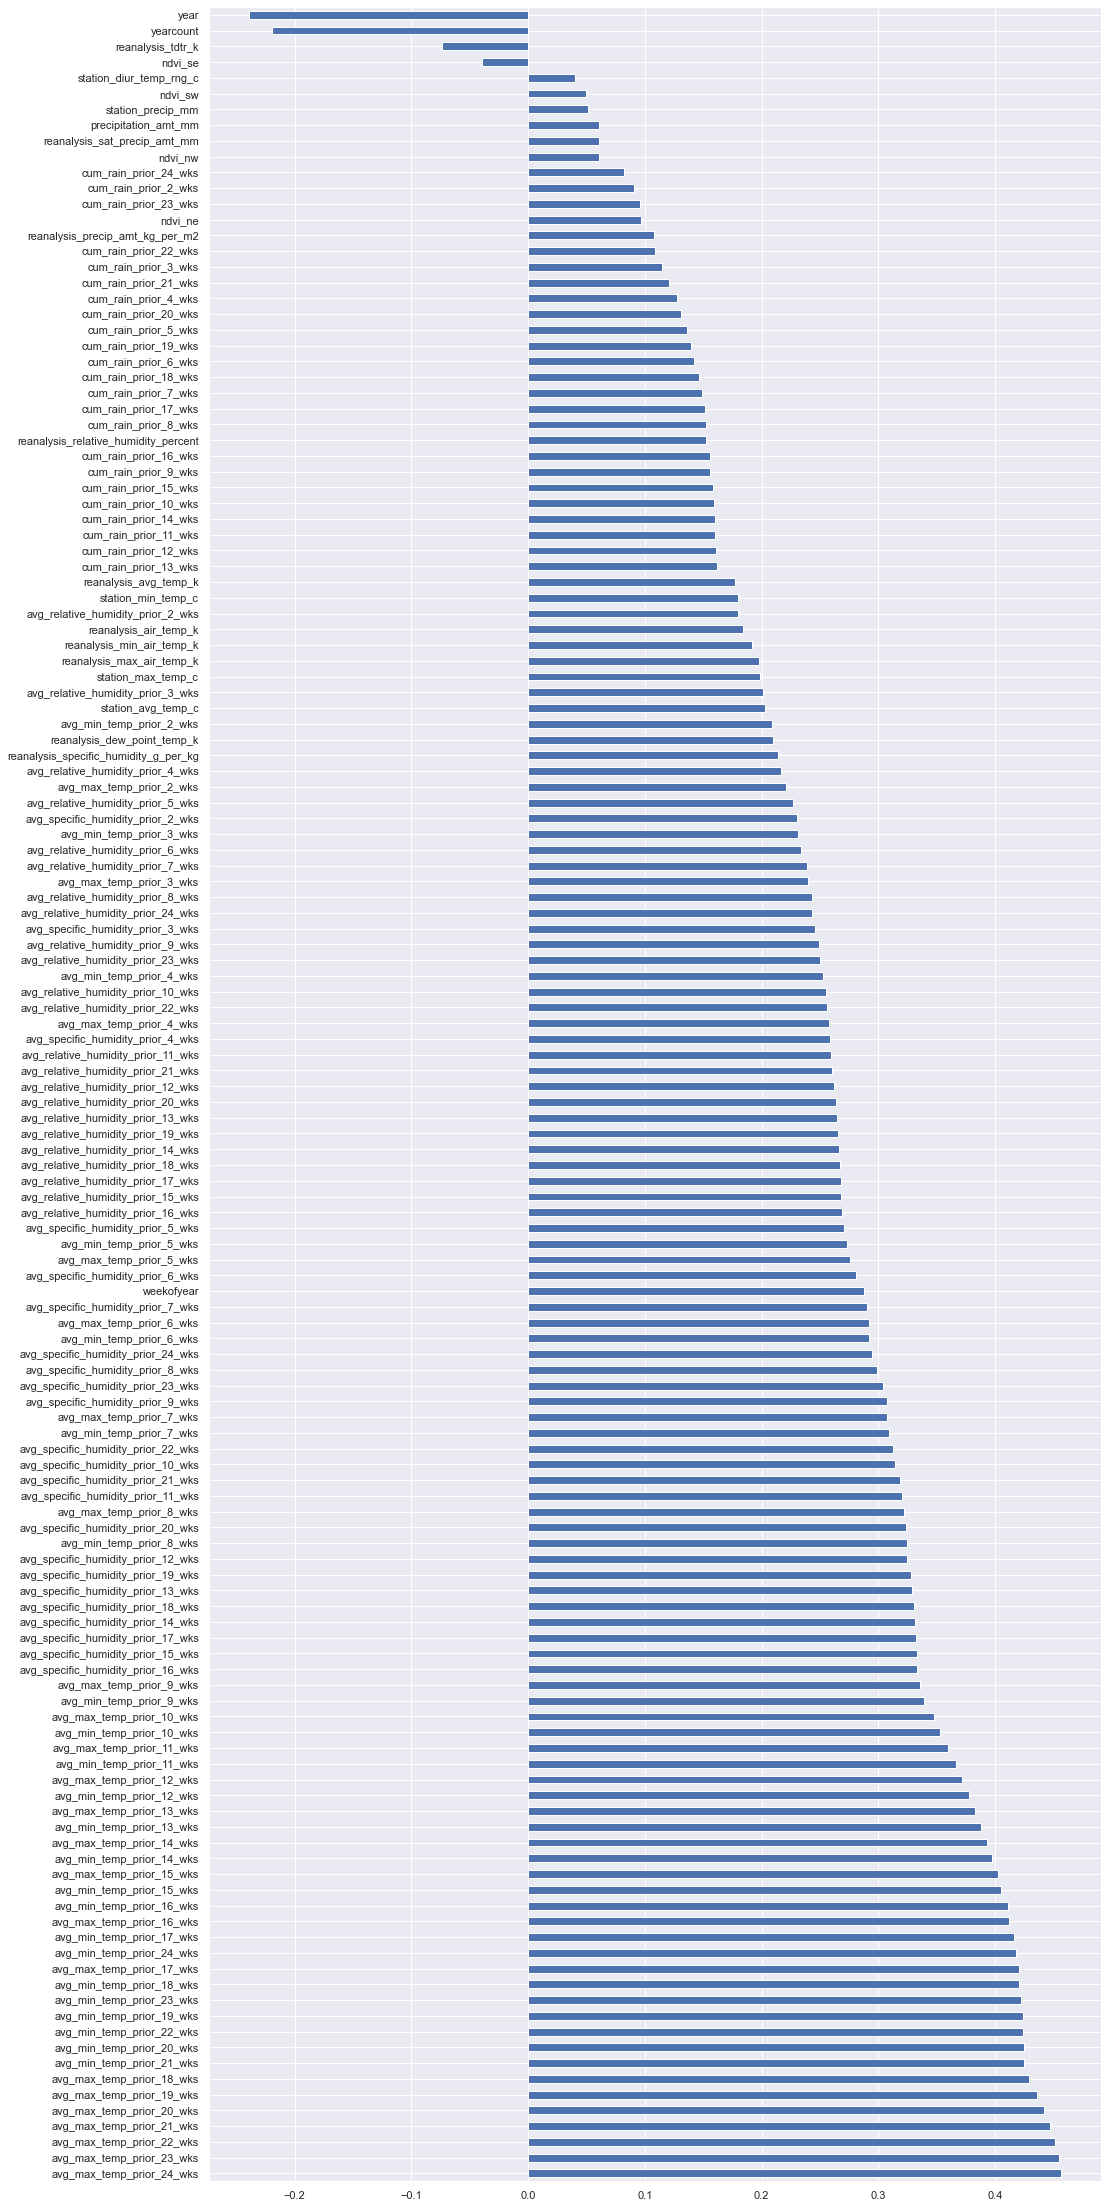

In [13]:
plt.figure(figsize=(16, 40))

(sj_corr
     .total_cases
     .drop(['total_cases','avg_total_cases_2_wks','cum_total_cases_2_wks']) #leave out total_cases since it will self-correlate
     .sort_values(ascending=False)
     .plot
     .barh())

Based on  correlation, SJ would use the following features:
- avg_max_temp_prior_24_wks
- avg_min_temp_prior_21_wks


<AxesSubplot:>

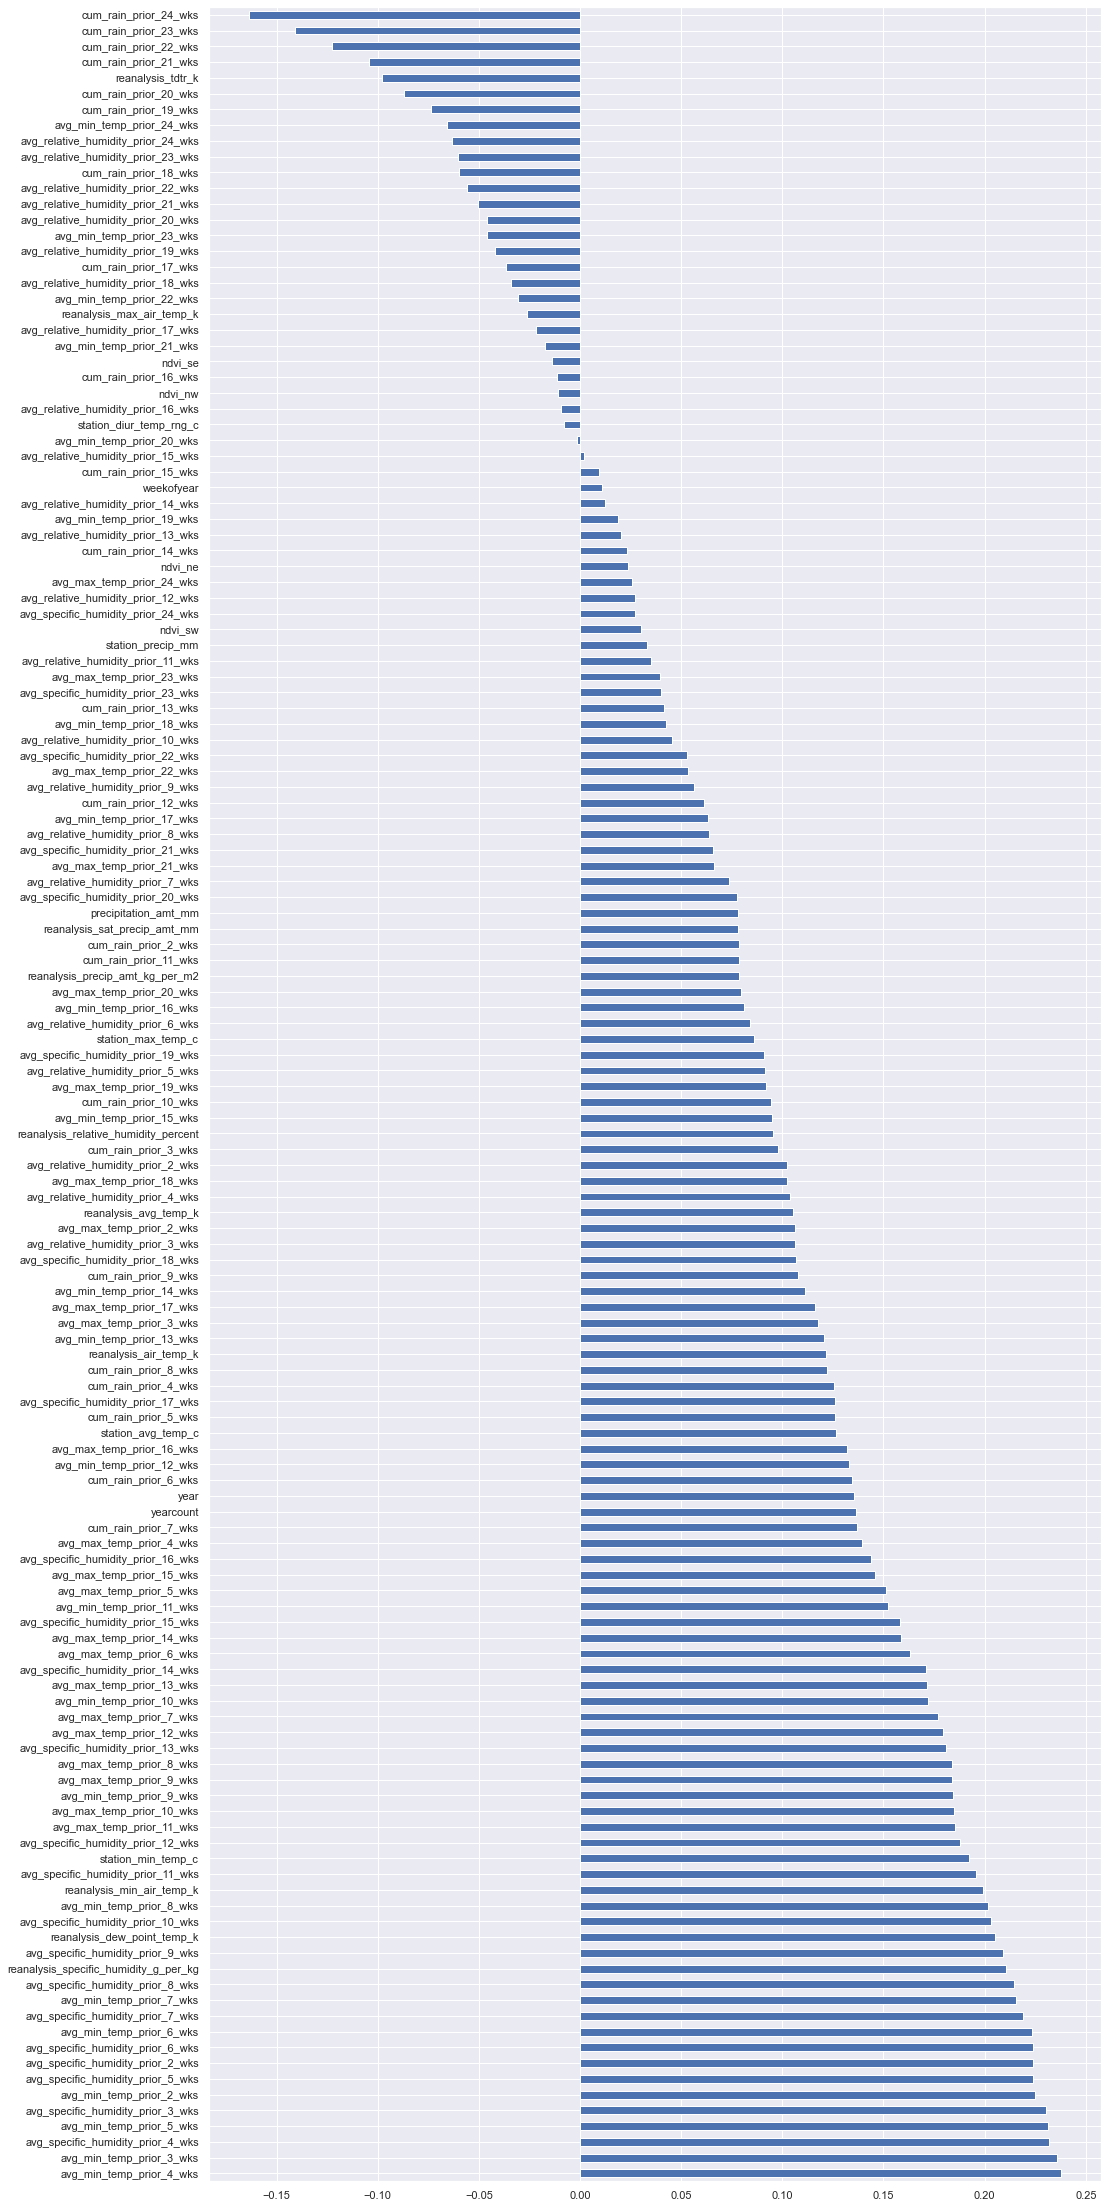

In [14]:
plt.figure(figsize=(16, 40))

(iq_corr
     .total_cases
     .drop(['total_cases','avg_total_cases_2_wks','cum_total_cases_2_wks']) #leave out total cases since it will self correlate
     .sort_values(ascending=False)
     .plot
     .barh())

Based on correlation, features for IQ would be:
- avg_min_temp_prior_4_wks
- avg_specific_humidity_prior_4_wks

##### Plot of Correlation Between Total Cases and Features for Time Lags of 1-16 Weeks for IQ
Largest correlations appear between weeks 11-13

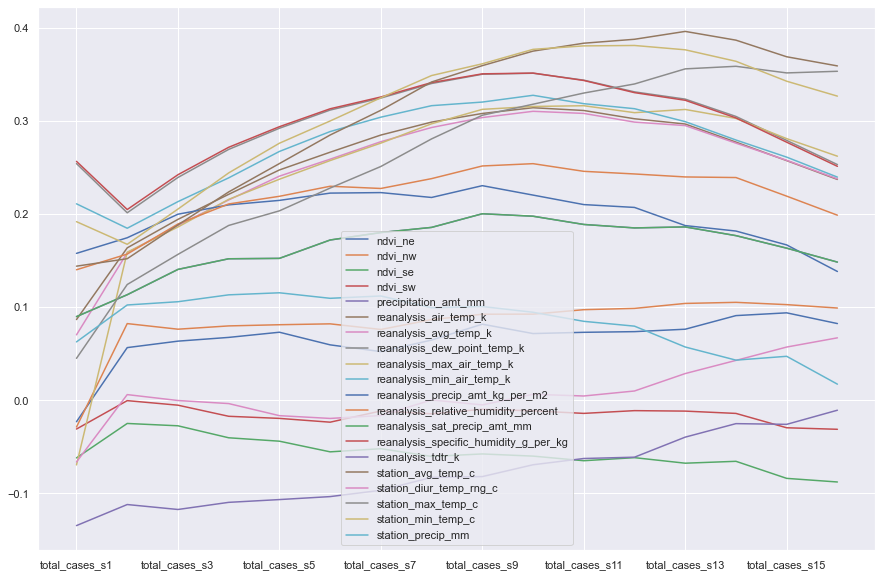

In [18]:
#quick plot of the correlations for iq
df_t=df_corr_iq.T
df_t.iloc[:,0:20].plot(figsize=(15,10))

#### Class Imbalance
The dataset has several outbreaks interspersed into a sort of background level of cases per day. The number of total cases is influenced heavily by the prior number of cases. To some extent you can think of an outbreak as a class - either there's no outbreak, an outbreak, or a really bad outbreak (e.g., 1994). Since the outbreaks occur about every 2-3 years, they are under-represented in the sample data. One solution is then to look at the outbreaks and make sure the training sample size has an equal weight by severity.

In [5]:
#df_severity=pd.DataFrame()
df_x=load_input_data()
df_x=interp(df_x)
df_severity=df_x.loc[:,['city','outbreak_severity','total_cases']].groupby(['city','outbreak_severity']).count()
df_severity

total_cases
city outbreak_severity             
iq   0                          448
     1                           42
     2                            7
sj   0                          834
     1                           57
     2                           22

### Time Series Analysis
This section looks at each feature as a time series and tries to find the optimum lag for each feature in order to build the training set

#### Autocorrelation of Total Cases

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

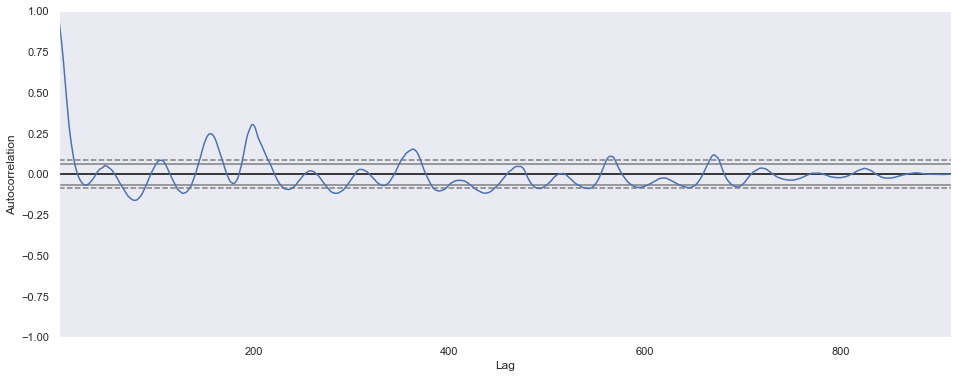

In [51]:
df=load_input_data()
df=df[df['city']=='sj']
plt.figure(figsize=(16, 6))
pd.plotting.autocorrelation_plot(df['total_cases'])

Lag for max correlation:      lag      corr
19  199.0  0.333161


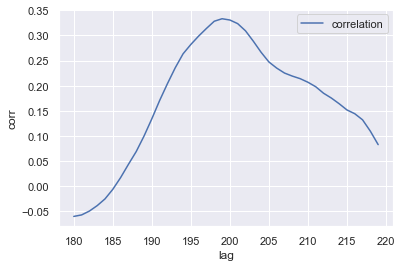

In [53]:
#check correlation around 200
df_corr=pd.DataFrame(columns=['lag','corr'])
for i in range(180,220):
    corr=df['total_cases'].corr(df['total_cases'].shift(i))
    r={'lag':i,'corr':corr}
    df_corr=df_corr.append(r,ignore_index=True)
    
sns.lineplot(data=df_corr,x='lag',y='corr',legend='brief',label='correlation')
print('Lag for max correlation:'+str(df_corr[df_corr['corr']==df_corr['corr'].max()]))

<Figure size 1152x720 with 0 Axes>

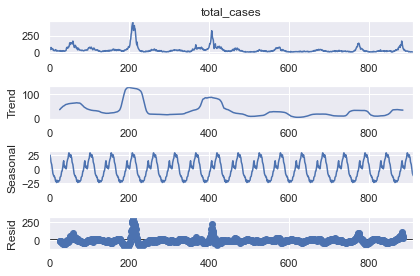

In [47]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
df['week_start_date']=pd.to_datetime(df['week_start_date'])

decomposed = seasonal_decompose(df['total_cases'], model='additive',period=53)
plt.figure(figsize=(16, 10))
x = decomposed.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

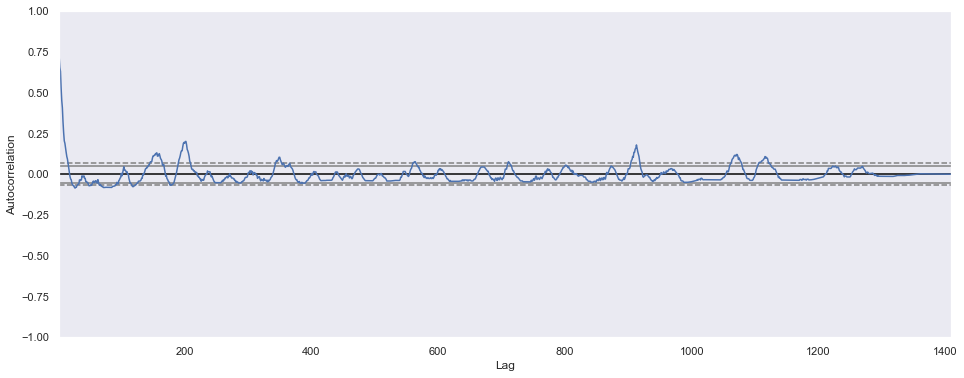

In [13]:
plt.figure(figsize=(16, 6))
pd.plotting.autocorrelation_plot(df['outbreak_severity'])

Lag for max correlation:      lag      corr
22  202.0  0.233421


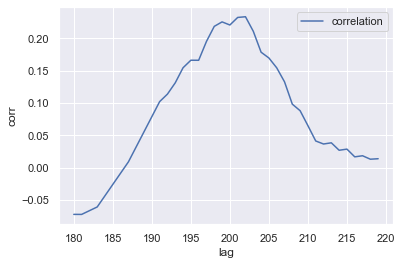

In [42]:
#check correlation around 200
df_corr=pd.DataFrame(columns=['lag','corr'])
for i in range(180,220):
    corr=df['outbreak_severity'].corr(df['outbreak_severity'].shift(i))
    r={'lag':i,'corr':corr}
    df_corr=df_corr.append(r,ignore_index=True)
    
sns.lineplot(data=df_corr,x='lag',y='corr',legend='brief',label='correlation')
print('Lag for max correlation:'+str(df_corr[df_corr['corr']==df_corr['corr'].max()]))

#### Time Series Iterator
The time series iterator takes the data input file (provided training data) and creates a set of time series for a specified combination of a time lag and features. It also splits into both training and test sets for training and label data. For example, if there are 1000 rows in the training data and you specify a lag of 50, it will create 950 time series data sets of 50 steps each (950 because it's 1000 minus the lag).

In [4]:
#Get data for the iterator
#Iterator to evaluate best time lag for each features
def ts_iterator(lag,city,target,feature,train_split=1.0,test_split=0.0):
    #Load the training data
    #df_x=load_input_data()
    df_x=pd.read_csv('inputdata/training_all.csv')
    
    #Iterpolate missing values
    df_x=interp(df_x)
    
    #Select the data just for a single city
    df_x=df_x[df_x['city']==city]
    df_x=df_x[[feature]]
    df_x.reset_index(drop=True,inplace=True)
    f_col_idx=df_x.columns.get_loc(feature)

    #df_y=load_label_data()
    df_y=pd.read_csv('inputdata/labels_all.csv')
    df_y=df_y[df_y['city']==city]
    df_y.reset_index(drop=True,inplace=True)
    
    test_split=int(test_split*len(df_x)) #Test split is 30% of dataset
    x=[] #feature data
    y=[] #label data

    #Create the iterator
    for i in range(lag,len(df_x)): #start at the step represents the lookback and go to the last timestep in the frame
        t=[]
        for j in range(lag+1): #For each step in the lookback
            t.append(df_x.iloc[(i-lag+j),f_col_idx]) #get the values of all features for the lookback period and append to a list. Start at the 
                                                 #beginning of the lookback period and roll forward (i-lookback+j). Note the feature set will not include the target
        
        x.append(t) #append all input features for the lookbook period to create the training series
        y.append(df_y.loc[i,target]) #Get the target value for the step (total_cases)

    #Convert lists to numpy arrays and then reshape to 3 dimensions (sample size, time steps(lookback), number of features)
    x,y=np.array(x),np.array(y)
    x_test=x[:test_split] #take off the test data as a separate array
    x=x[test_split:] #remove the test data from x
    x=x.reshape(x.shape[0],lag+1,1)
    x_test=x_test.reshape(x_test.shape[0],lag+1,1)
    y_test=y[:test_split]
    y=y[test_split:]
    y=np.reshape(y,(-1,1)) #reshape into 2d array from 1d with only a single feature
    y_test=np.reshape(y_test,(-1,1))
    
    return x, x_test, y, y_test

#x, x_test, y, y_test=ts_iterator(lag=lag,city=city,target=target,feature=feature)

#print shapes to verify they came out as 3d array
#print('x shape: ' + str(x.shape))
#print('x test shape: ' + str(x_test.shape))
#print('y shape: '+ str(y.shape))
#print('y test shape: ' + str(y_test.shape))

#### Time Series Regressor
The following code allows you to specify a time series lag amount. It will then create a separate set of time series of length 1 to length *lag* for each row in the input file. It will then run a cross validated regression mean absoluate value (MAE) score on each time series length and persist the average MAE. In this way, one can look to see which time series length creates the best regession with the target value for each feature in the data set.

For example, if you want to see feature X is correlated with target value y at lag t to t-50, and there are 1000 rows of X and y, the code will create 950 (1000-50) sets of data of length 1, 2,3,...50. For each length and ech input feature, it will run a regression tree and return the average MAE score to persist. 

In [ ]:
#Run a regression for each 50 step series and calculate the MAE
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import cross_val_score
from statistics import mean
from datetime import datetime

#df=load_input_data()
df=pd.read_csv('inputdata/training_all.csv')

df_mae=pd.DataFrame() #df of MAE scores
mae=[]
depth=6
dtr=DecisionTreeRegressor(random_state=0)
lag=51
feature=[]
feature_list=df.columns[4:].tolist()
target='total_cases'
city='iq'
#print(feature_list)

for f in range(len(feature_list)):
    feature=feature_list[f]
    mae=[]
    lag_list=[]
    s_time=datetime.now()
    for i in range(lag):
        #x, x_test, y, y_test=ts_iterator(lag=i+1,city=city,target=target,feature=feature,train_split=1.0,test_split=0.0)
        x, x_test, y, y_test=ts_iterator(lag=i,city=city,target=target,feature=feature,train_split=1.0,test_split=0.0)
        x_val=x.reshape(x.shape[0],x.shape[1]) #flatten array
        y_val=y
        score=(cross_val_score(dtr,x_val,y_val,scoring='neg_mean_absolute_error',cv=3))
        mae.append(mean(score))
        lag_list.append(i)
        print('   Lag ' + str(i) + ' of ' + str(lag-1) + ' Complete.' + ' x shape is ' + str(x.shape) + ' and x_val shape is ' + str(x_val.shape) + ' and y_val shape is ' + str(y_val.shape))

    df_mae['lag']=lag_list
    df_mae[feature_list[f]]=mae
    f_time=datetime.now()
    ex_time=f_time-s_time
    re_time=(len(feature_list)-f)*ex_time
    print('Feature ' + str(f+1) + ' of ' + str(len(feature_list)) + ' complete. Execution time for feature was ' + str(ex_time) + ' and est remaining time is ' + str(re_time))

df_mae.to_csv('mae_all_all' + str(city) + '_lag' + str(lag-1) + '.csv')
df_mae.head()

In [44]:
#df_mae.to_csv('mae_' + str(city)+ '1.csv')

#### MAE Scores for City='sj'
This model was run with a regressor constained to a max depth of six and was run for the entire 50 week lookback. Ultimately the Seaborn view is too limited in the notebook. For a full view of all engineered features for each city, look at the excel workbooks.

<AxesSubplot:ylabel='lag'>

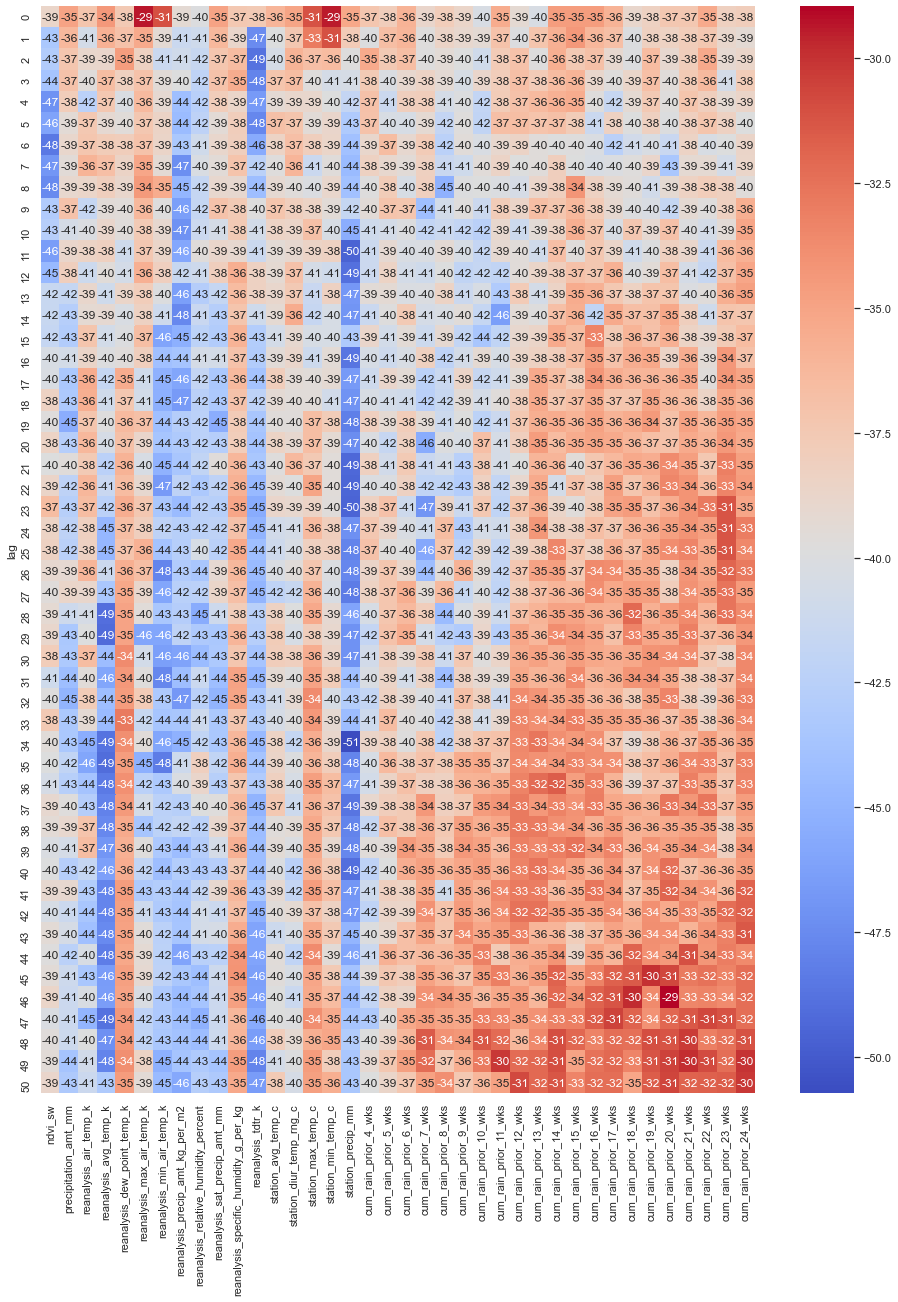

In [13]:
#Create a heatmap to look at MAE",
df_mae_sj=pd.read_csv('mae_sj_lag50.csv',index_col=1)
df_mae_sj=df_mae_sj.iloc[:,5:] #Drop the lag number and the NDVI columns
#df_mae_sj=df_mae_sj.drop(['outbreak_severity'],axis=1)
plt.figure(figsize=(16, 20))
sns.heatmap(df_mae_sj,vmin=df_mae_sj.min().min(),vmax=df_mae_sj.max().max(),annot=True,cmap='coolwarm')

<AxesSubplot:ylabel='lag'>

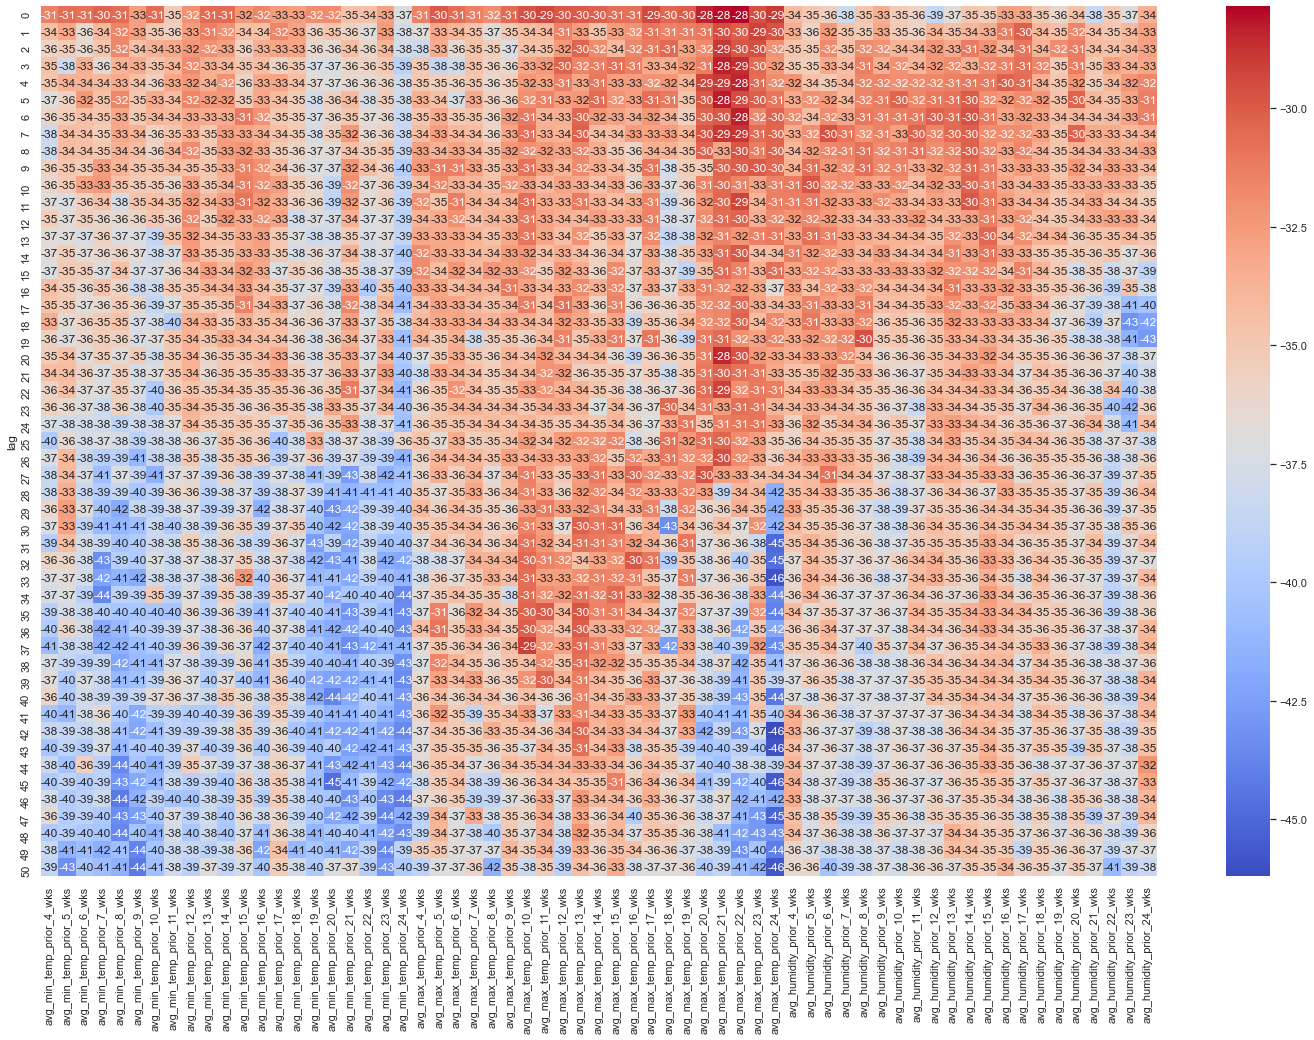

In [65]:
#Create a heatmap to look at MAE",
df_mae_sj=pd.read_csv('mae_min_tempsj_lag50.csv',index_col=1)
df_mae_sj=df_mae_sj.iloc[:,23:] #Drop the lag number and the NDVI columns
#df_mae_sj=df_mae_iq.drop(['outbreak_severity','total_cases'],axis=1)
plt.figure(figsize=(25, 16))
sns.heatmap(df_mae_sj,vmin=df_mae_sj.min().min(),vmax=df_mae_sj.max().max(),annot=True,cmap='coolwarm')

The model below was run with only a 20 week lookback, nd did not constrain the model to any max depth.

<AxesSubplot:ylabel='lag'>

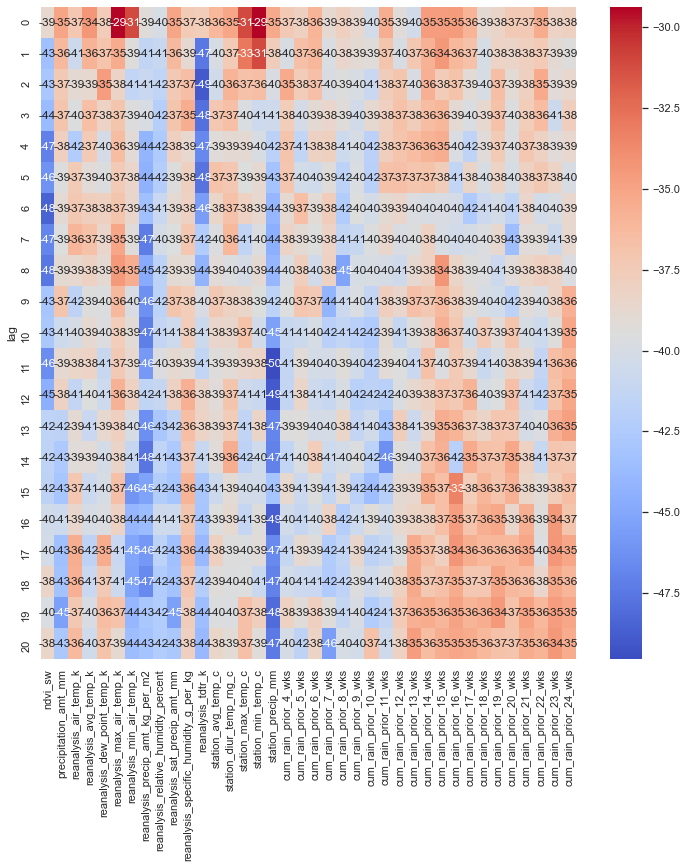

In [15]:
#Create a heatmap to look at MAE",
df_mae_sj=pd.read_csv('mae_sj_lag50.csv',index_col=1)
df_mae_sj=df_mae_sj.iloc[:21,5:] #Drop the lag number and the NDVI columns
df_mae_sj=df_mae_sj.drop(['outbreak_severity'],axis=1)
plt.figure(figsize=(12, 12))
sns.heatmap(df_mae_sj,vmin=df_mae_sj.min().min(),vmax=df_mae_sj.max().max(),annot=True,cmap='coolwarm')

**Model Columns for SJ:**<br>
Get the minimum MAE for columns. Apply a MAE threshold of -31 and ignore everything over that
- reanalysis_dew_point_temp_k lag 11
- station_max_temp_c lag 0
- station_min_temp_c lag 0
- reanalysis_min_air_temp_k lag 0
- reanalysis_specific_humidity_g_per_kg lag 13
- cum_rain_prior_21_wks lag 46
- avg_min_temp_prior_7_wks 0
- avg_max_temp_prior_10_wks lag 37
- avg_max_temp_prior_20_wks lag 0
- avg_max_temp_prior_21_wks lag 0
- avg_max_temp_prior_22_wks lag 0
- avg_humidity_prior_14_wks lag 6
- avg_max_temp_prior_24_wks lag 0
- avg_min_temp_prior_21_wks lag 0


#### MAE Scores for City='iq'
This model was run with a regressor constained to a max depth of six and was run for the entire 50 week lookback

<AxesSubplot:ylabel='lag'>

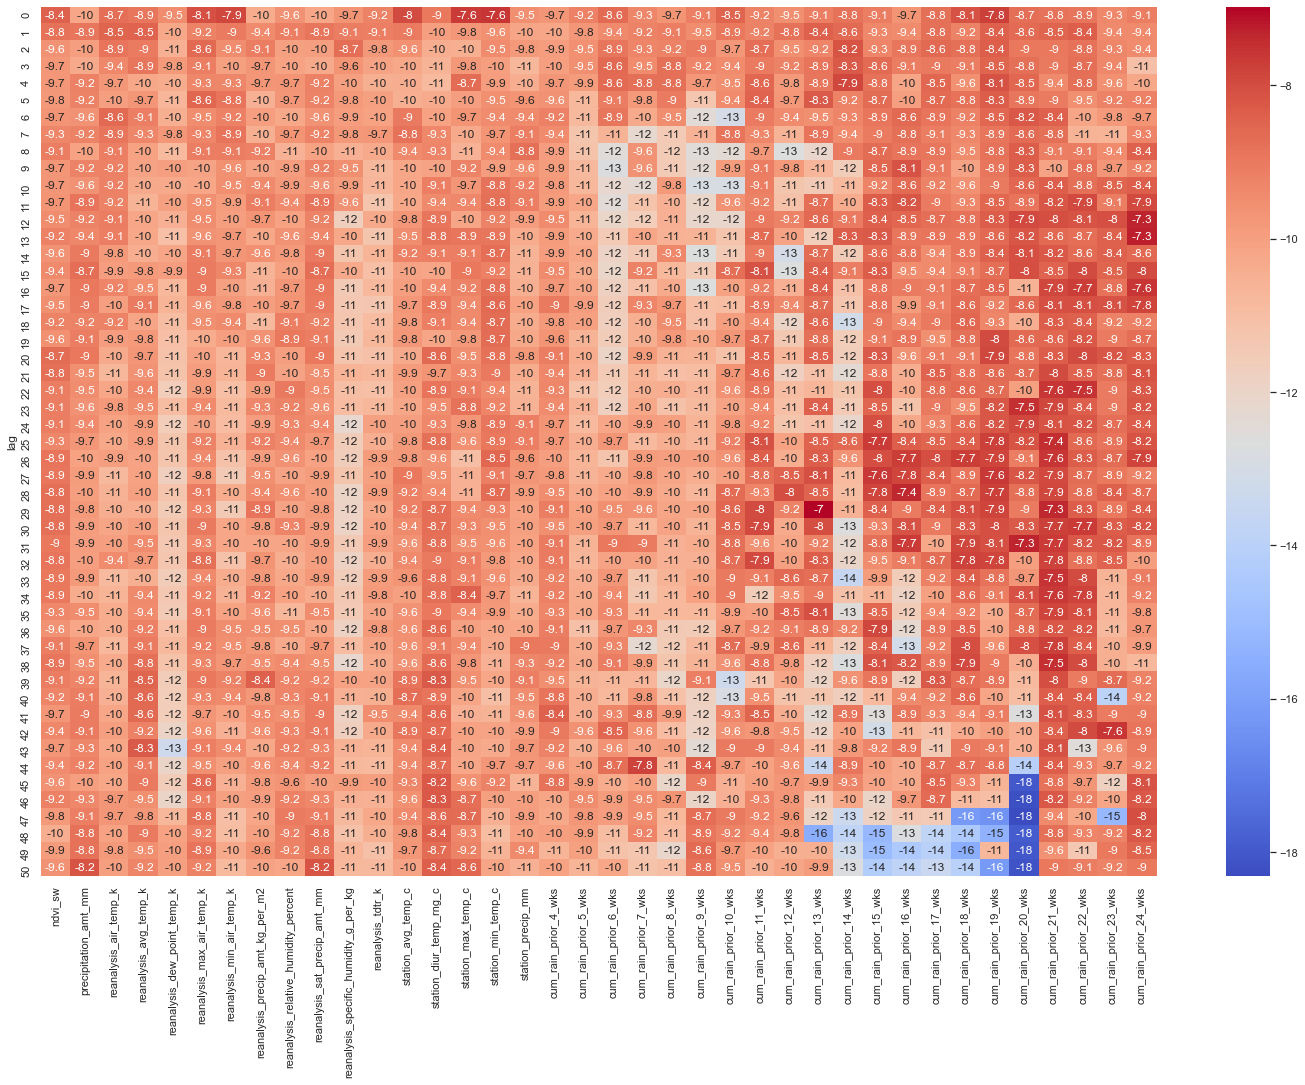

In [18]:
#Create a heatmap to look at MAE",
df_mae_iq=pd.read_csv('mae_iq_lag50.csv',index_col=1)
df_mae_iq=df_mae_iq.iloc[:,5:] #Drop the lag number and the NDVI columns
df_mae_iq=df_mae_iq.drop(['outbreak_severity','total_cases'],axis=1)
plt.figure(figsize=(25, 16))
sns.heatmap(df_mae_iq,vmin=df_mae_iq.min().min(),vmax=df_mae_iq.max().max(),annot=True,cmap='coolwarm')

<AxesSubplot:ylabel='lag'>

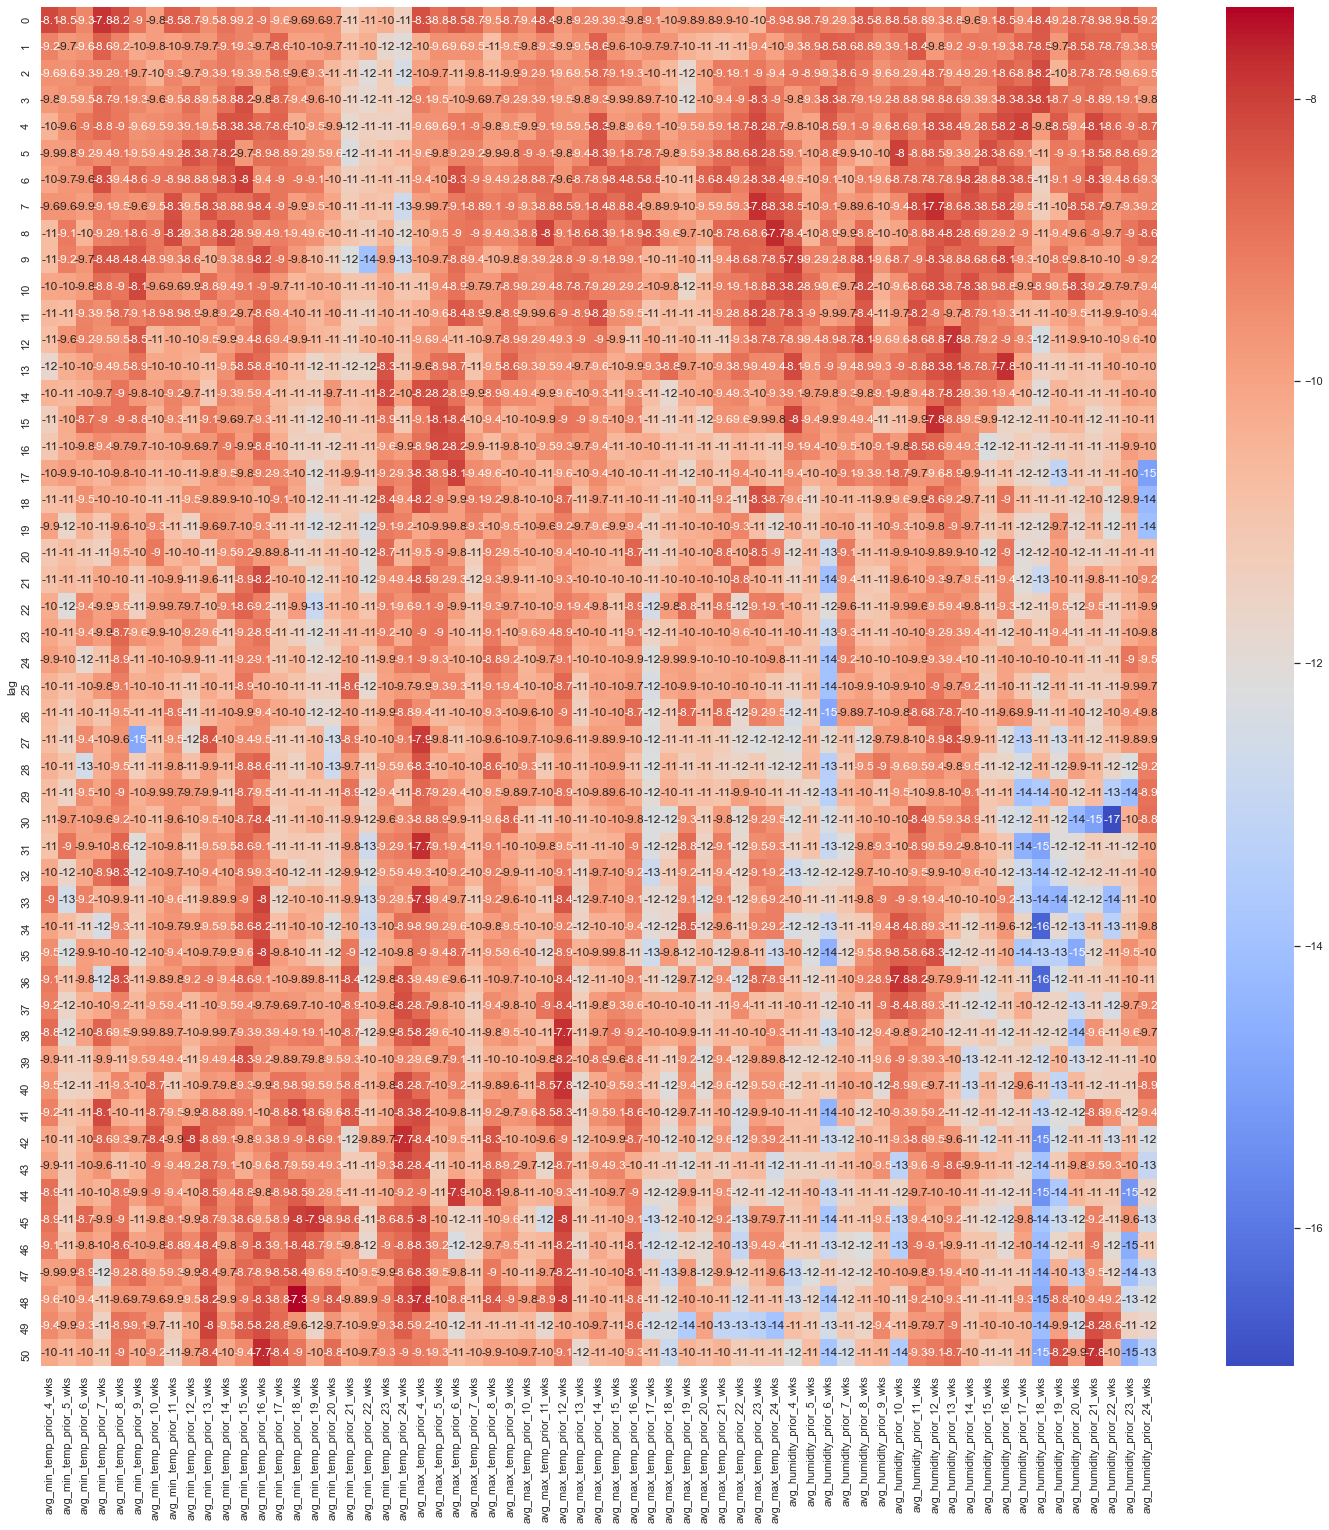

In [67]:
#Create a heatmap to look at MAE",
df_mae_iq=pd.read_csv('mae_min_tempiq_lag50.csv',index_col=1)
df_mae_iq=df_mae_iq.iloc[:,23:] #Drop the lag number and the NDVI columns
#df_mae_sj=df_mae_iq.drop(['outbreak_severity','total_cases'],axis=1)
plt.figure(figsize=(25, 25))
sns.heatmap(df_mae_iq,vmin=df_mae_iq.min().min(),vmax=df_mae_iq.max().max(),annot=True,cmap='coolwarm')

<AxesSubplot:ylabel='lag'>

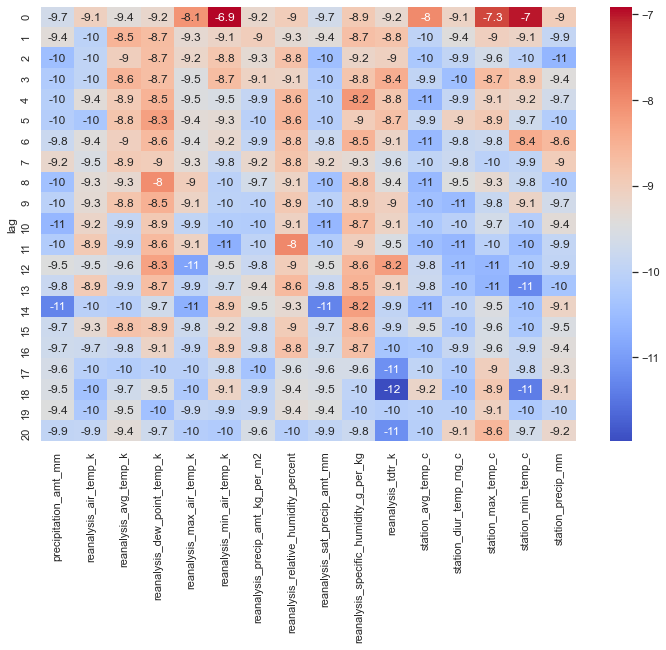

In [138]:
#Create a heatmap to look at MAE",
df_mae_iq=pd.read_csv('mae_iq_lag50.csv',index_col=1)
df_mae_iq=df_mae_iq.iloc[:21,5:] #Drop the lag number and the NDVI columns
plt.figure(figsize=(12, 8))
sns.heatmap(df_mae_iq,vmin=df_mae_iq.min().min(),vmax=df_mae_iq.max().max(),annot=True,cmap='coolwarm')

**Model Columns for IQ:**<br>
Get the minimum MAE for columns. Apply a MAE threshold of -8.5 and ignore everything over that
- reanalysis_dew_point_temp_k lag 8
- reanalysis_max_air_temp_k lag 0
- reanalysis_min_air_temp_k lag 0
- reanalysis_relative_humidity_percent lag 11
- reanalysis_specific_humidity_g_per_kg lag 12
- reanalysis_tdtr_k lag 3
- station_avg_temp_c lag 0
- station_max_temp_c lag 0
- station_min_temp_c lag 0
- cum_rain_prior_13_wks lag 29
- avg_min_temp_prior_18_wks lag 48